# About Dataset

    - Task Details

                                                                                                                                                                                                                                                                                                                                                                                                                          Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform. Clean this   data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.



# Analyze data and provide some trends.
- Year with best rating
- does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find


# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")



# Importing The Dataset

In [2]:
dm = pd.read_csv("IMDb Movies India.csv", encoding= "latin-1")

In [3]:
dm.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# checking shape og the dataset
dm.shape

(15509, 10)

In [5]:
dm.duplicated().sum()

6

In [6]:
# removing duplicates value
dm.drop_duplicates(inplace=True)

In [7]:
df = dm.copy()

In [8]:
# checking unique value of all the column
for i in df:
    print(i)
    print(df[i].unique().tolist())
    print(" ")

Name
[' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', '#Yaaram', '...And Once Again', '...Aur Pyaar Ho Gaya', '...Yahaan', '.in for Motion', '?: A Question Mark', '@Andheri', '1:1.6 An Ode to Lost Love', '1:13:7 Ek Tera Saath', '100 Days', '100% Love', '101 Ratein', '102 Not Out', '108 Limited', '108 Teerthyatra', '10ml LOVE', "11 O'Clock", '12 Bulbule', "12 O'Clock", '12 Years', '124a', '127 B', '13 May Gulaabi Nagar', '13 Tribute of Love', '13B: Fear Has a New Address', '14 Phere', '15 Park Avenue', '150 Seconds Ago', '15th August', '16-Dec', '18.11', '1857', '19 Revolutions', '1911', '1920', '1920 London', '1920: Evil Returns', '1921', '1942: A Love Story', '1971', '1978: A Teen Night Out', '1982 - A Love Marriage', '19th January', '2 Band Radio', '2 GB Ki Life', '2 Little Indians', '2 Nights in Soul Valley', '2-Oct', '2 Piece', '2 States', '2', '2001: Do Hazaar Ek', '2006 Varanasi: The Untold', '2007 the last encounter', '2016 the End', '21: Battle of Saragarhi', '22 Days

In [9]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print(" ")

Name
Anjaam                7
Mamta                 7
Zindagi               6
Toofan                5
Shikari               5
                     ..
Hamari Yaad Aayegi    1
Hameer Hath           1
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Zulm-O-Sitam          1
Name: Name, Length: 13838, dtype: int64
 
Year
-2019.0    408
-2021.0    392
-2018.0    381
-2017.0    360
-2005.0    346
          ... 
-1917.0      1
-1913.0      1
-1926.0      1
-1914.0      1
-1924.0      1
Name: Year, Length: 102, dtype: int64
 
Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: Duration, Length: 182, dtype: int64
 
Genre
Drama                         2779
Action                        1288
Thriller                       777
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Cr

### checking missing value

In [10]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [11]:
df.isnull().mean()*100

Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
dtype: float64

### seprate the data into test according to Target variable  missing data

In [12]:
test = df[df["Rating"].isnull()]

In [13]:
train = df[df["Rating"].notna()]

In [14]:
train.shape

(7919, 10)

In [15]:
train.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 680.5+ KB


### we can't fill with mode method in these clumn bkz there mode will not work correctly to fill director and name of actor that's why we are using dropna function here

In [17]:
train.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [18]:
train.shape

(7558, 10)

now only shape is (7558, 10)

In [19]:
train.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


In [21]:
train["Year"]

1       -2019.0
3       -2019.0
5       -1997.0
6       -2005.0
8       -2012.0
          ...  
15501   -1992.0
15503   -1989.0
15504   -1988.0
15505   -1999.0
15508   -1998.0
Name: Year, Length: 7558, dtype: float64

removing - sign in front of values

In [22]:
train["Year"]= train["Year"].abs()

In [23]:
train["Year"].value_counts()

2019.0    238
2017.0    223
2018.0    214
2015.0    188
2016.0    184
         ... 
1939.0      4
1931.0      3
1932.0      2
1934.0      2
1917.0      1
Name: Year, Length: 92, dtype: int64

In [24]:
train["Year"].isnull().sum()

0

In [25]:
train["Year"].astype(int)

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15501    1992
15503    1989
15504    1988
15505    1999
15508    1998
Name: Year, Length: 7558, dtype: int32

# Duration

In [26]:
train["Duration"]

1        109 min
3        110 min
5        147 min
6        142 min
8         82 min
          ...   
15501        NaN
15503    125 min
15504        NaN
15505    129 min
15508    130 min
Name: Duration, Length: 7558, dtype: object

removing min from the end of the time

In [27]:
train["Duration"] = train["Duration"].str.rstrip("min")

In [28]:
train["Duration"].dtype

dtype('O')

In [29]:
train["Duration"].value_counts()

120     169
135     147
130     141
150     133
140     133
       ... 
46        1
201       1
247       1
211       1
250       1
Name: Duration, Length: 174, dtype: int64

In [30]:
train["Duration"] = train["Duration"].fillna(train["Duration"].median())

In [31]:
train["Duration"]

1         109 
3         110 
5         147 
6         142 
8          82 
         ...  
15501    135.0
15503     125 
15504    135.0
15505     129 
15508     130 
Name: Duration, Length: 7558, dtype: object

In [32]:
train["Duration"].astype(int)

1        109
3        110
5        147
6        142
8         82
        ... 
15501    135
15503    125
15504    135
15505    129
15508    130
Name: Duration, Length: 7558, dtype: int32

In [33]:
train["Duration"].isnull().sum()

0

In [34]:
train.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   float64
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


# EDA

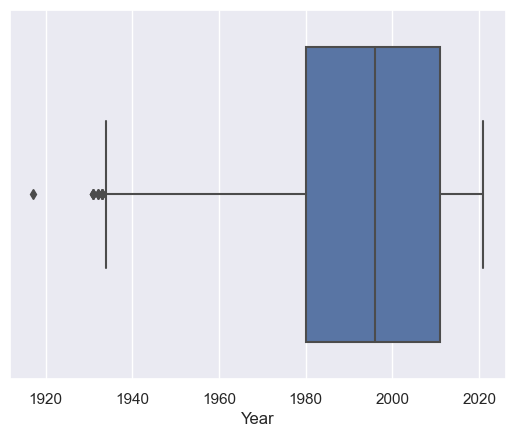

None


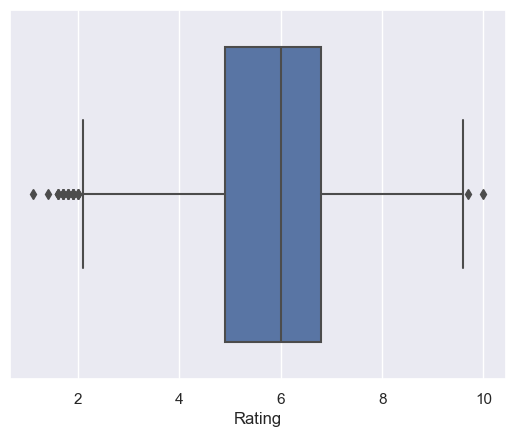

None


In [36]:
def obj(name):
    sns.boxplot(train[name])
    plt.show()
for i in train.select_dtypes(exclude="object"):
    print(obj(i))

In [37]:
def top_ten(col):
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
    train[col].value_counts()[:10].plot(kind = "bar", color = colors)
    
    plt.title("Top Ten {}s".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [38]:
a = ['Name', 'Director',  'Votes', 'Duration', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3']

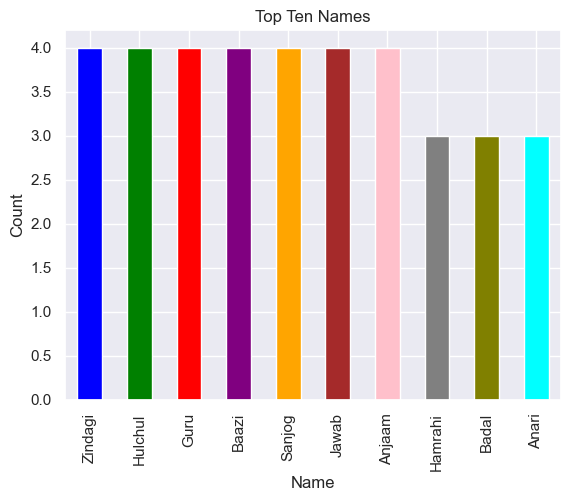

None


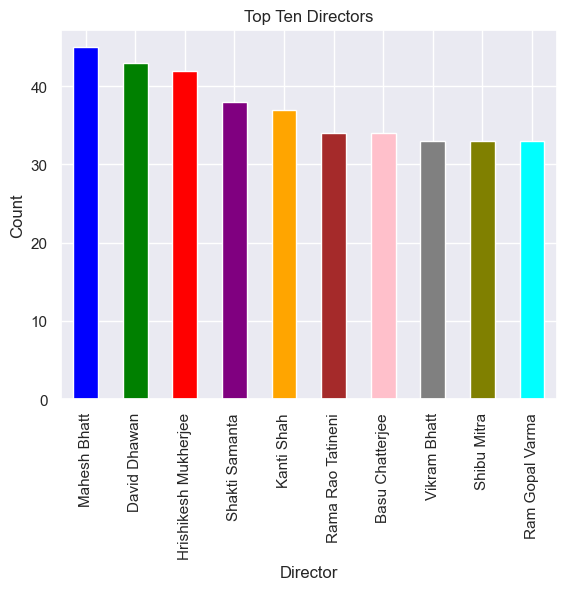

None


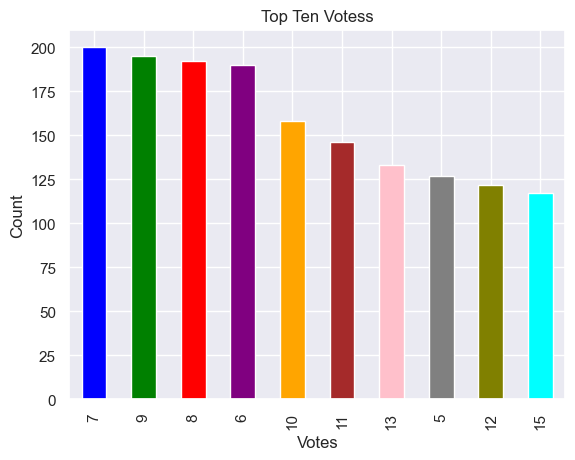

None


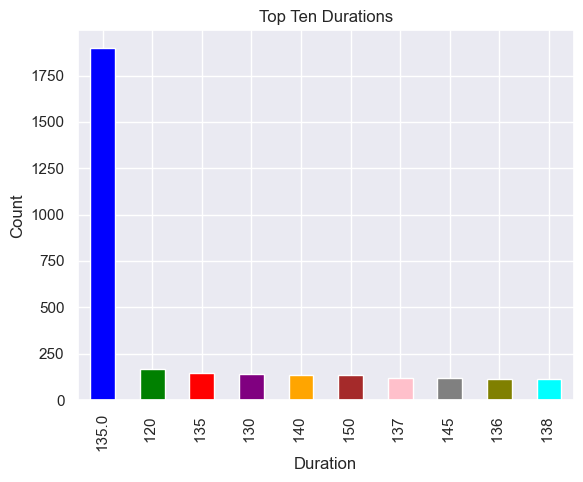

None


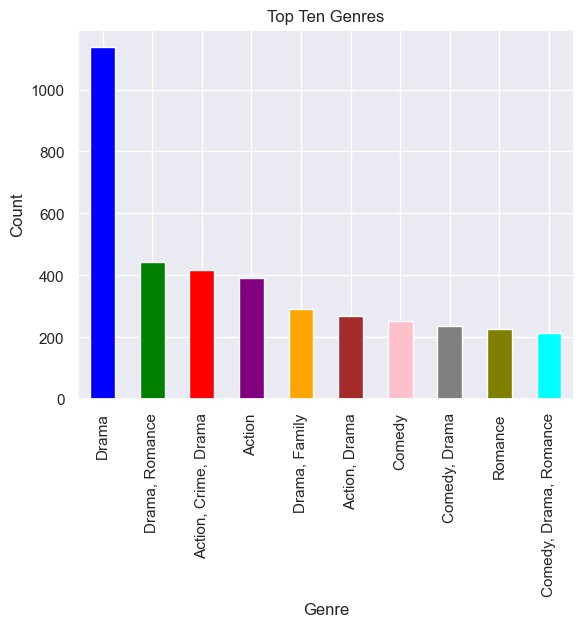

None


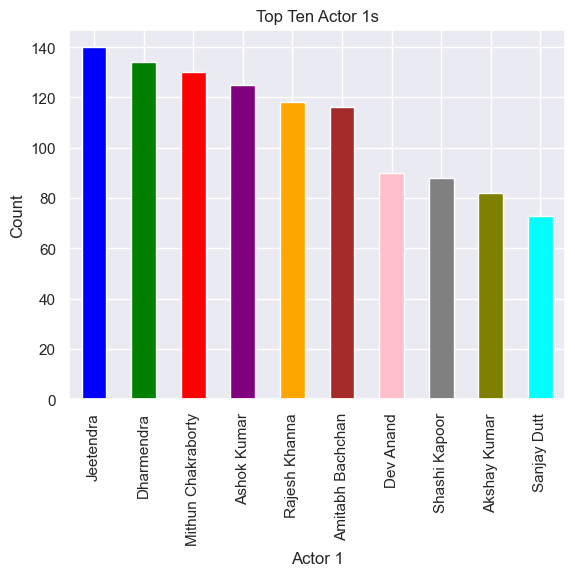

None


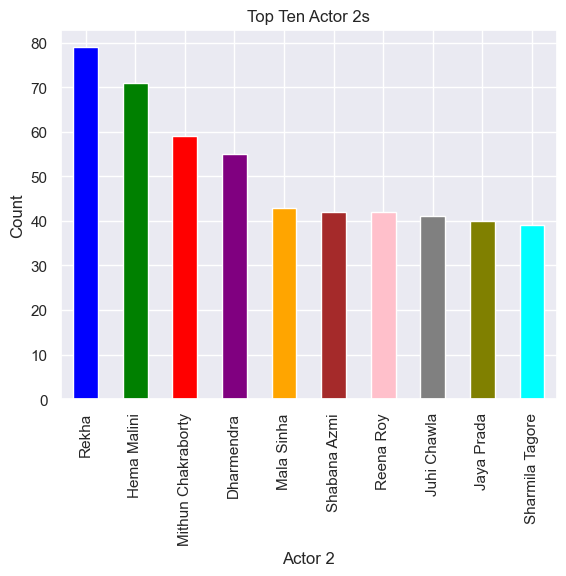

None


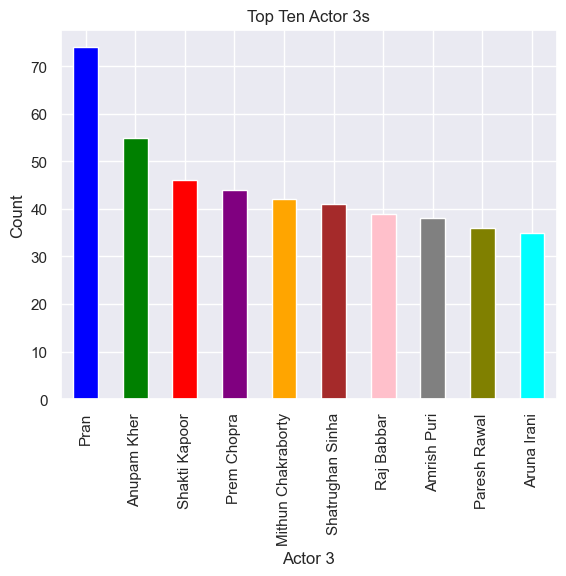

None


In [39]:
for i in a:
    print(top_ten(i))

- mahesh bhatt direct mostly movies, mostly movies have 125 min, highest genre was Drama

## showing lowest 10 values

In [40]:
def lowest_ten(col):
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
    value_counts = train[col].value_counts().sort_values(ascending=True)[:10]
    ax = value_counts.plot(kind="bar", color=colors)

    # Add count values on top of each bar
    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.title("Lowest Ten {}s".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


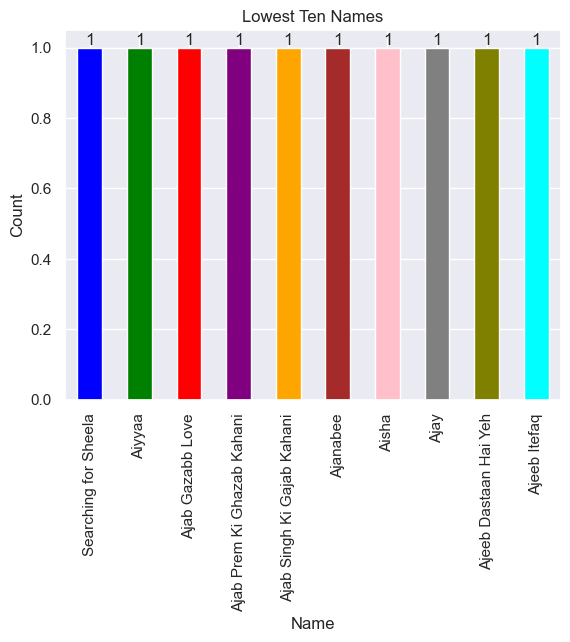

None


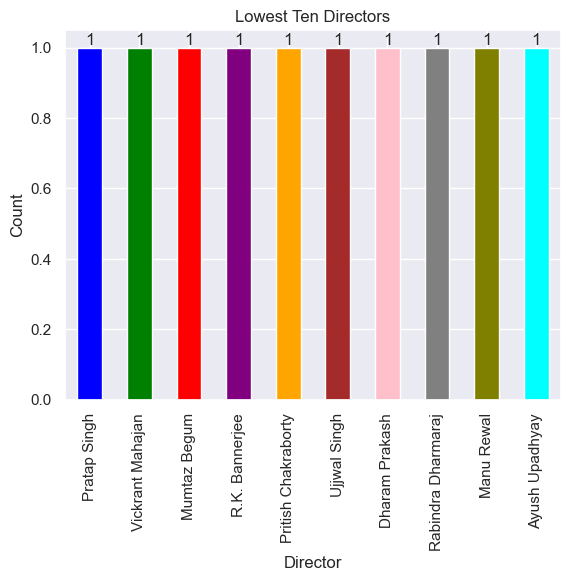

None


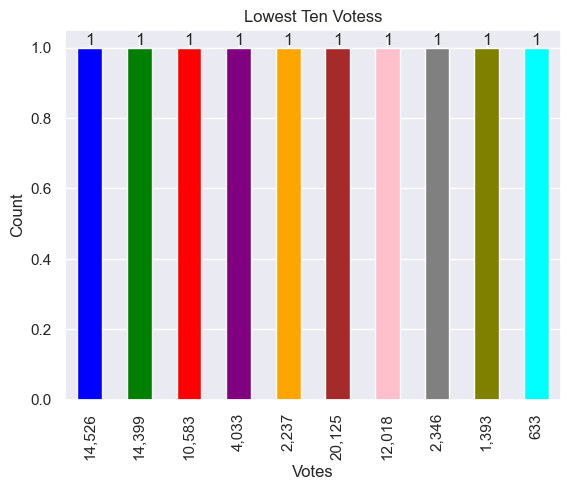

None


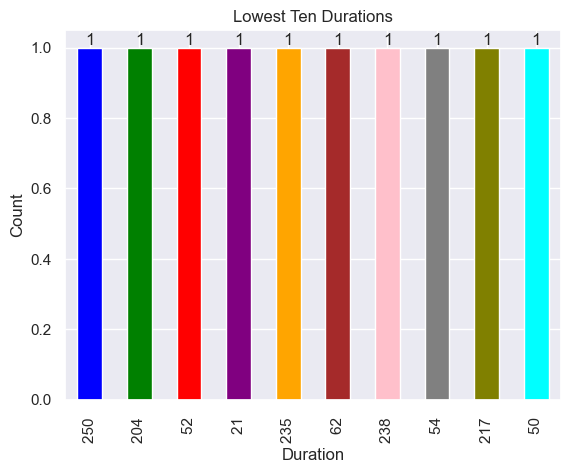

None


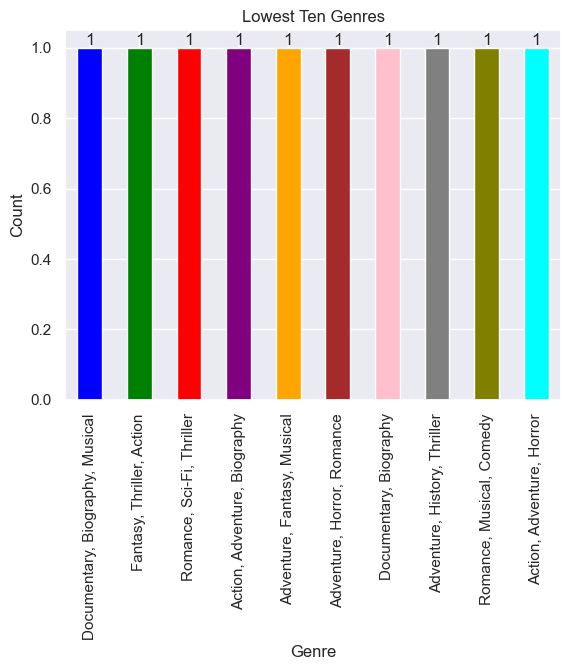

None


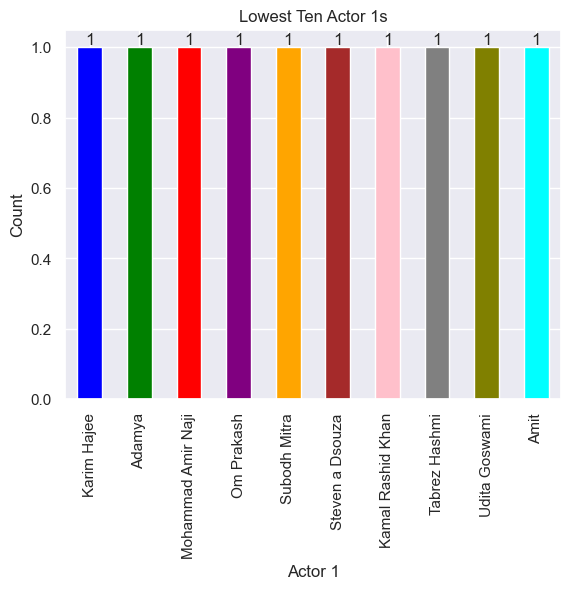

None


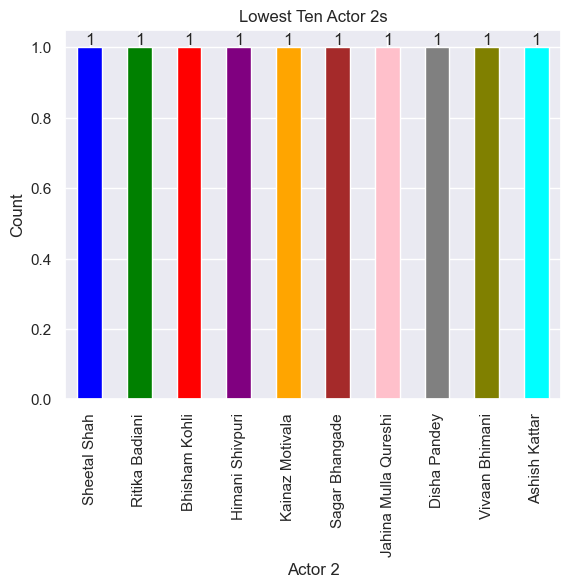

None


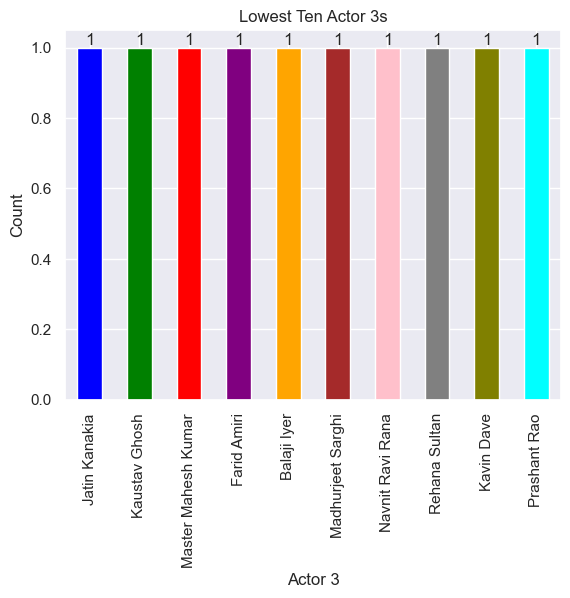

None


In [41]:
for i in a:
    print(lowest_ten(i))

In [42]:
# Sort the DataFrame based on the 'Rating' column in descending order
sorted_df = train.sort_values(by='Rating', ascending=False)

In [43]:
sorted_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020.0,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021.0,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020.0,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020.0,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019.0,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
...,...,...,...,...,...,...,...,...,...,...
6744,Jimmy,2008.0,135.0,"Action, Crime, Drama",1.6,249,Raj N. Sippy,Mimoh Chakraborty,Vikas Anand,Rahul Dev
9639,Mumbai Can Dance Saalaa,2015.0,135,Drama,1.6,43,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
15040,Welcome to New York,2018.0,118,"Comedy, Drama",1.6,774,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
3618,Desh Drohi,2008.0,140,"Action, Thriller",1.4,"3,899",Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt


<AxesSubplot:xlabel='Rating', ylabel='Name'>

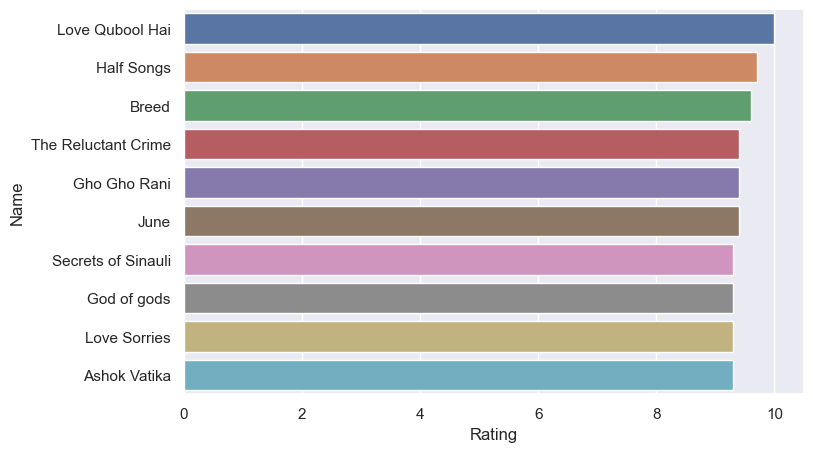

In [44]:
top_10_movies = sorted_df.head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Name', data=top_10_movies)

- highest rating received by "Love Qubool Hai" mavie

In [45]:
train["Votes"] = train["Votes"].str.replace(',', '').str.replace(' ', '').astype(int)

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

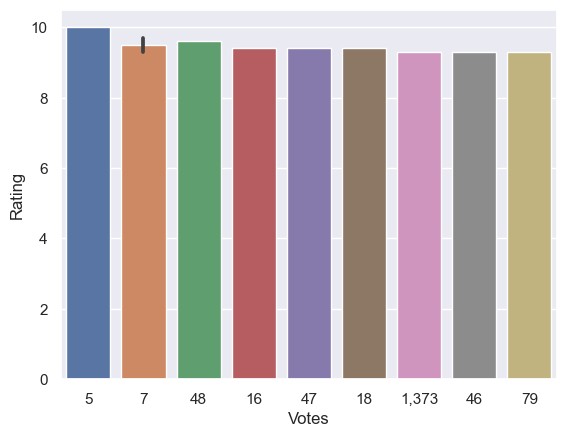

In [46]:
sns.barplot(x= "Votes", y = "Rating", data= top_10_movies)

- if rating is high so vote will be high not every time possible

<AxesSubplot:xlabel='Rating', ylabel='Director'>

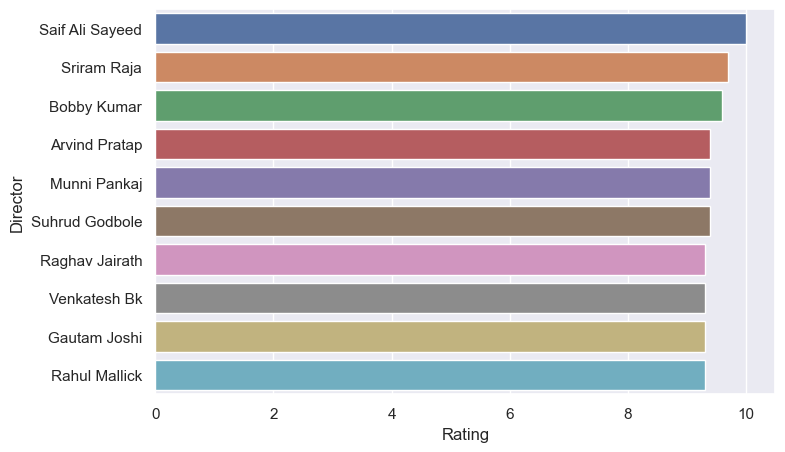

In [47]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Director', data=top_10_movies)

- Director Saif ali sayeed's movie received high rating

<AxesSubplot:xlabel='Rating', ylabel='Actor 1'>

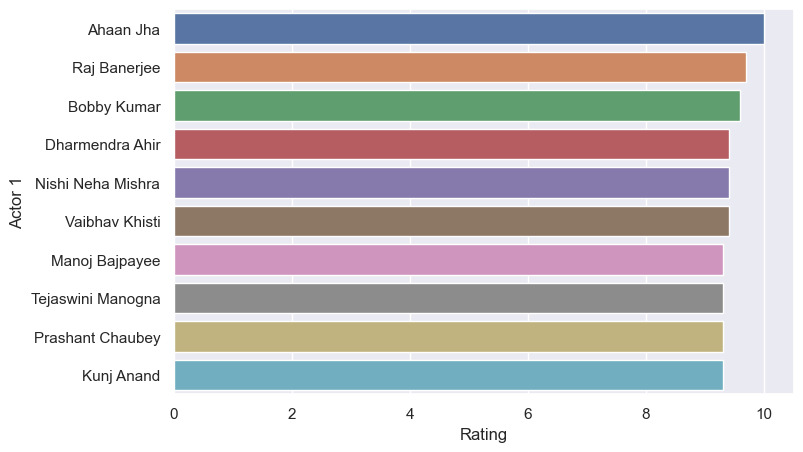

In [48]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Actor 1', data=top_10_movies)

<AxesSubplot:xlabel='Rating', ylabel='Actor 2'>

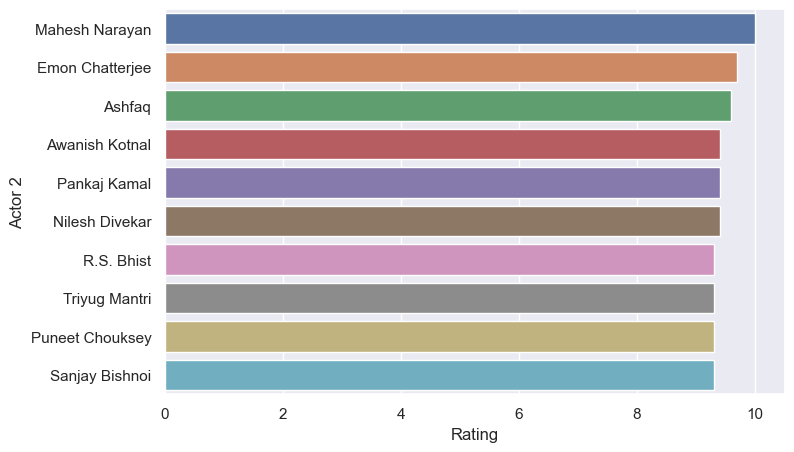

In [49]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Actor 2', data=top_10_movies)

<AxesSubplot:xlabel='Rating', ylabel='Actor 3'>

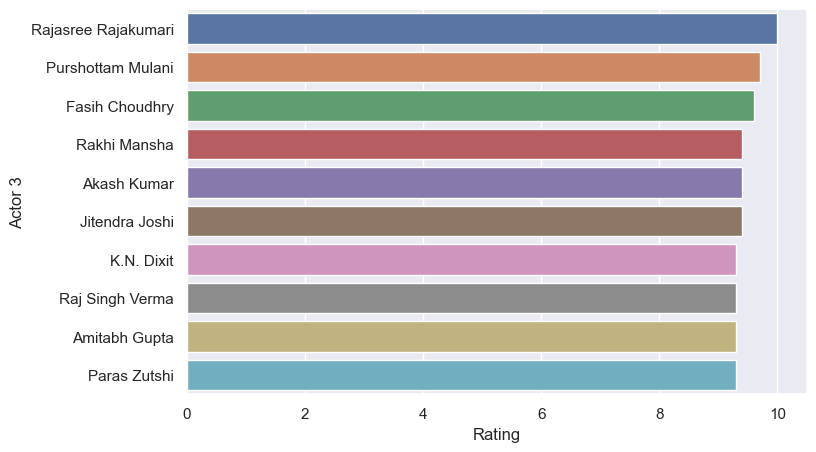

In [50]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Actor 3', data=top_10_movies)

<AxesSubplot:xlabel='Year', ylabel='Rating'>

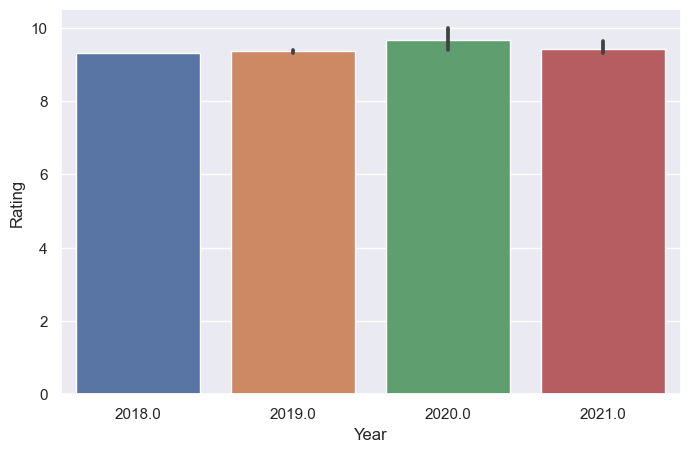

In [51]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Year', y='Rating', data=top_10_movies)

- 2020 receive highest rating

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

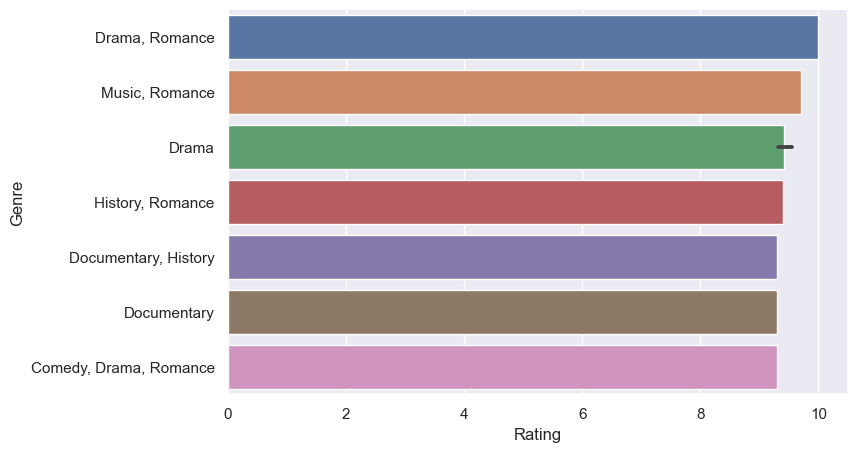

In [52]:
# Create a bar plot using seaborn
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Genre', data=top_10_movies)

In [53]:
train["Duration"] = train["Duration"].astype(int)

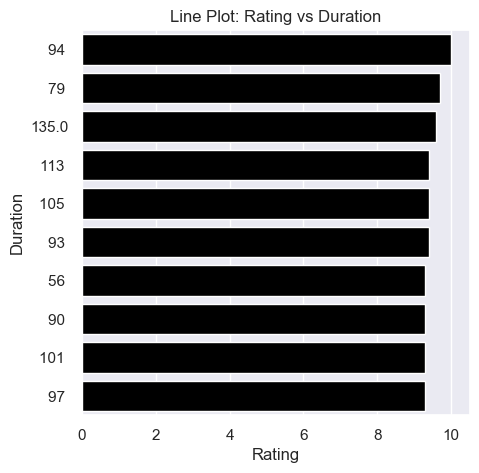

In [54]:
# Create a line plot using seaborn
plt.figure(figsize=(5,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Duration', data=top_10_movies, color="black")

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Line Plot: Rating vs Duration')

# Show the plot
plt.show()

In [55]:
top_20_movies = sorted_df.head(20)

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

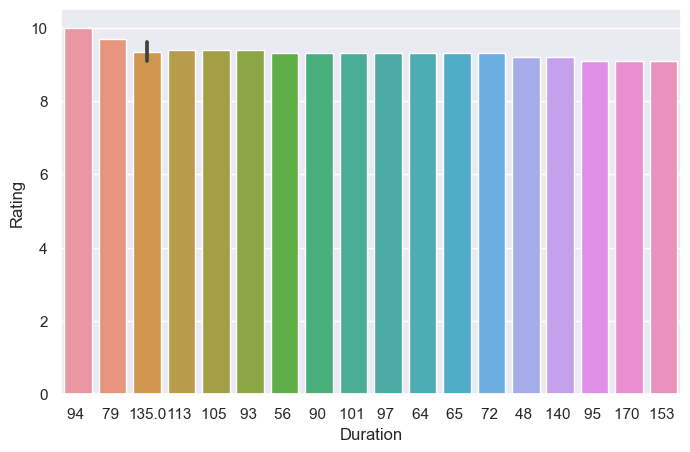

In [56]:
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Duration', y='Rating', data=top_20_movies)

In [57]:
top_30_movies = sorted_df.head(30)

<AxesSubplot:xlabel='Rating', ylabel='Duration'>

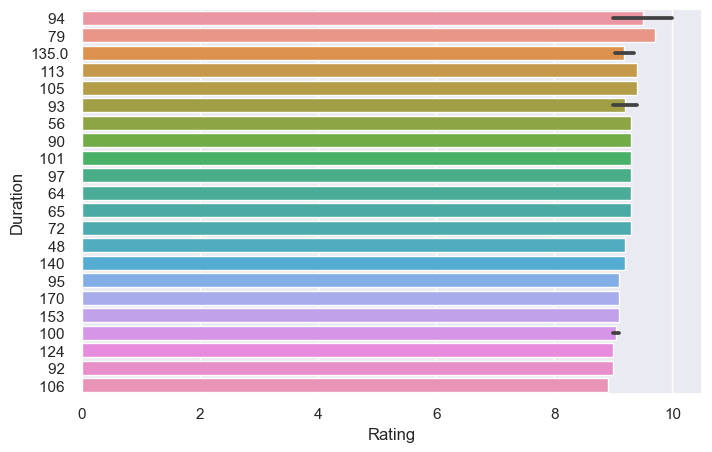

In [58]:
plt.figure(figsize=(8,5))  # Adjust the figure size if needed
sns.barplot(x='Rating', y='Duration', data=top_30_movies)

- check with all head 10,20,30 Duration impact the rating

# highest movie release in which year

In [59]:
result = train.groupby("Year")["Name"].agg(['count'])
print(result)

        count
Year         
1917.0      1
1931.0      3
1932.0      2
1933.0      4
1934.0      2
...       ...
2017.0    223
2018.0    214
2019.0    238
2020.0    157
2021.0     69

[92 rows x 1 columns]


AxesSubplot(0.125,0.11;0.775x0.77)


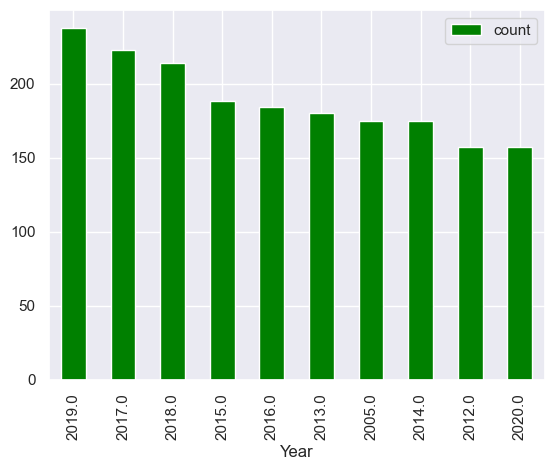

In [60]:
result_sorted = result.sort_values(by='count', ascending=False)
colors = ['green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
top_10_counts_mov = result_sorted.head(10)
print(top_10_counts_mov.plot(kind="bar", color= colors))

- highest movie release in 2019

In [61]:
direct = train.groupby("Director")["Name"].agg(["count"])
print(direct)

                      count
Director                   
A. Bhimsingh             17
A. Jagannathan            3
A. Kodandarami Reddy      2
A. Majid                  1
A. Muthu                  1
...                     ...
Zia Sarhadi               3
Ziaullah Khan             1
Zoya Akhtar               7
Zubair Khan               2
Zunaid Memon              1

[2956 rows x 1 columns]


In [62]:
sort_10 = direct.sort_values(by="count", ascending= False)
sort_10_re = sort_10.head(10)
sort_10_re

,count
Director,
Mahesh Bhatt,45
David Dhawan,43
Hrishikesh Mukherjee,42
Shakti Samanta,38
Kanti Shah,37
Basu Chatterjee,34
Rama Rao Tatineni,34
Ram Gopal Varma,33
Shibu Mitra,33


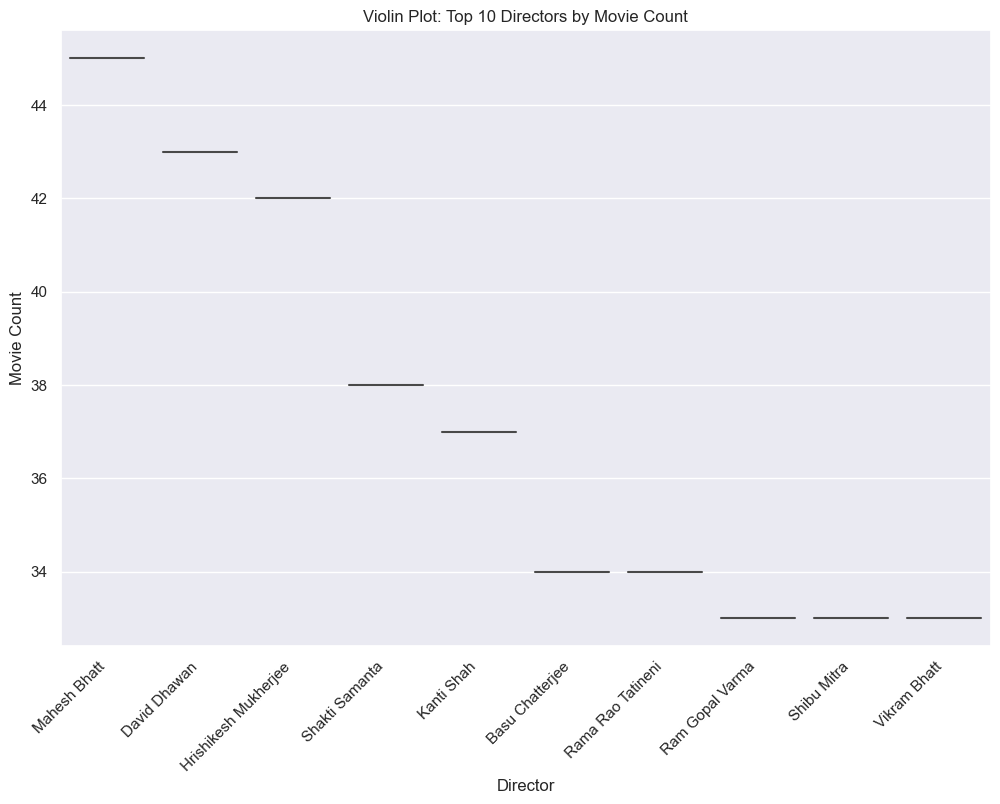

In [63]:
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.violinplot(x=sort_10_re.index, y='count', data=sort_10_re)

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.title('Violin Plot: Top 10 Directors by Movie Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# which genre mostly prefer by people

In [64]:
votes_ = train.groupby("Genre")["Votes"].agg(["max"])
votes_

,max
Genre,
Action,1909
"Action, Adventure",18219
"Action, Adventure, Biography",1343
"Action, Adventure, Comedy",78448
"Action, Adventure, Crime",3064
...,...
"Thriller, Action",34
"Thriller, Musical, Mystery",341
"Thriller, Mystery",137


In [65]:
votes_1  = votes_.sort_values(by= "max", ascending= False)
votes_1 = votes_1.head(10)
votes_1

,max
Genre,
"Adventure, Drama, Fantasy",591417
"Comedy, Drama",357889
"Biography, Drama",220526
"Biography, Drama, History",220118
"Adventure, Comedy, Drama",185127
"Drama, Family",175810
"Comedy, Drama, Musical",168150
"Action, Biography, Drama",165074
"Action, Crime, Thriller",162455


<AxesSubplot:xlabel='Genre'>

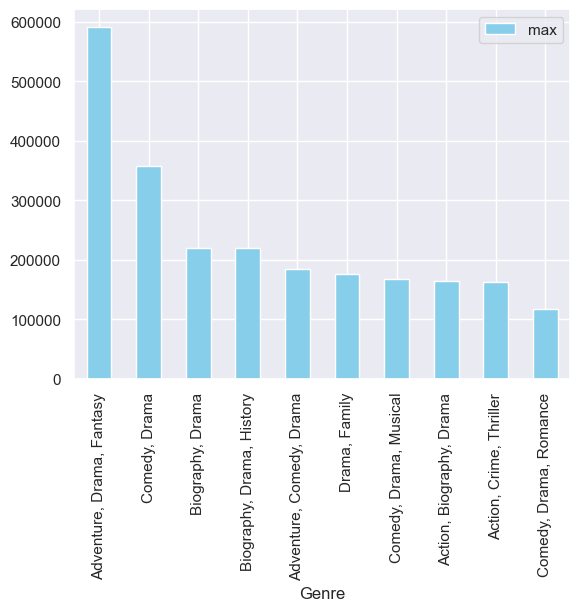

In [66]:
votes_1["max"] = pd.to_numeric(votes_1["max"], errors='coerce')

# Sort the DataFrame by the "max" column
votes_1 = votes_1.sort_values(by="max", ascending=False)

# Take the top 10 rows
votes_1 = votes_1.head(10)

# Plot the data
votes_1.plot(kind="bar", color='skyblue')


- highly genre act on "Adventure, Drama, Fantacy"

In [67]:
votes_lo  = votes_.sort_values(by= "max", ascending= False)
votes_lo = votes_lo.tail(10)
votes_lo

,max
Genre,
"Action, Musical",9
"Fantasy, Musical, Drama",8
"Adventure, Crime, Mystery",8
"Adventure, Fantasy, Musical",7
"Crime, Fantasy, Mystery",7
"Animation, Family, History",6
"Animation, Comedy, Family",6
"Adventure, Mystery",5
"Musical, Mystery",5


In [68]:
vot = train.sort_values(by= "Votes", ascending= False)
votee = vot.head(10)
votee

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,Life of Pi,2012.0,127,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
75,3 Idiots,2009.0,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
8233,Lion,2016.0,118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4848,Gandhi,1982.0,191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
14038,The Darjeeling Limited,2007.0,91,"Adventure, Comedy, Drama",7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman
8228,Like Stars on Earth,2007.0,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
10882,PK,2014.0,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
3410,Dangal,2016.0,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
11463,Radhe,2021.0,135,"Action, Crime, Thriller",1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
3829,Dil Bechara,2020.0,101,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid


<AxesSubplot:xlabel='Rating', ylabel='Votes'>

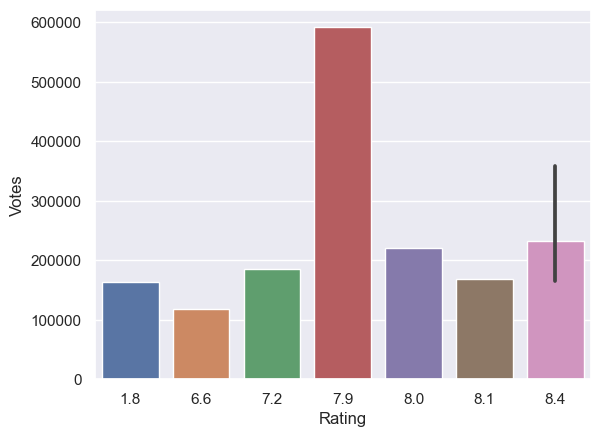

In [69]:
sns.barplot(x = "Rating", y= "Votes", data = votee)

- if votes is high so rating will be high is not compulsory

In [70]:
# checking no. of unique value in every column
for i in train:
    print(i)
    print(train[i].nunique())
    print(" ")

Name
7038
 
Year
92
 
Duration
174
 
Genre
416
 
Rating
84
 
Votes
2030
 
Director
2956
 
Actor 1
2415
 
Actor 2
2783
 
Actor 3
3031
 


# all obj column from the data

In [71]:
obj = train.select_dtypes(include="object")

In [72]:
obj

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,"Action, Crime, Drama",Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [73]:
train["Duration"] = train["Duration"].astype(int)

In [74]:
train["Votes"]

1           8
3          35
5         827
6        1086
8         326
         ... 
15501     135
15503      44
15504      11
15505     655
15508      20
Name: Votes, Length: 7558, dtype: int32

In [75]:
obj = train.select_dtypes(include="object")

In [76]:
obj

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,"Action, Crime, Drama",Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [77]:
# drop name column
train = train.drop("Name", axis=1)

In [78]:
train.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [79]:
obj = train.select_dtypes(include="object")

In [80]:
obj

,Genre,Director,Actor 1,Actor 2,Actor 3
1,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...
15501,"Action, Crime, Drama",Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [81]:
train1 = train.copy()

# encoding

In [82]:
actor1_encoding_map = train.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = train.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = train.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = train.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = train.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [83]:
train['actor1_encoded'] = round(train['Actor 1'].map(actor1_encoding_map['Rating']),1)
train['actor2_encoded'] = round(train['Actor 2'].map(actor2_encoding_map['Rating']),1)
train['actor3_encoded'] = round(train['Actor 3'].map(actor3_encoding_map['Rating']),1)
train['director_encoded'] = round(train['Director'].map(director_encoding_map['Rating']),1)
train['genre_encoded'] = round(train['Genre'].map(genre_encoding_map['Rating']),1)

In [84]:
train.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
train.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019.0,109,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019.0,110,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997.0,147,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005.0,142,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012.0,82,5.6,326,5.6,5.9,5.6,5.6,5.5


In [85]:
# train.describe()

# Heatmap chart

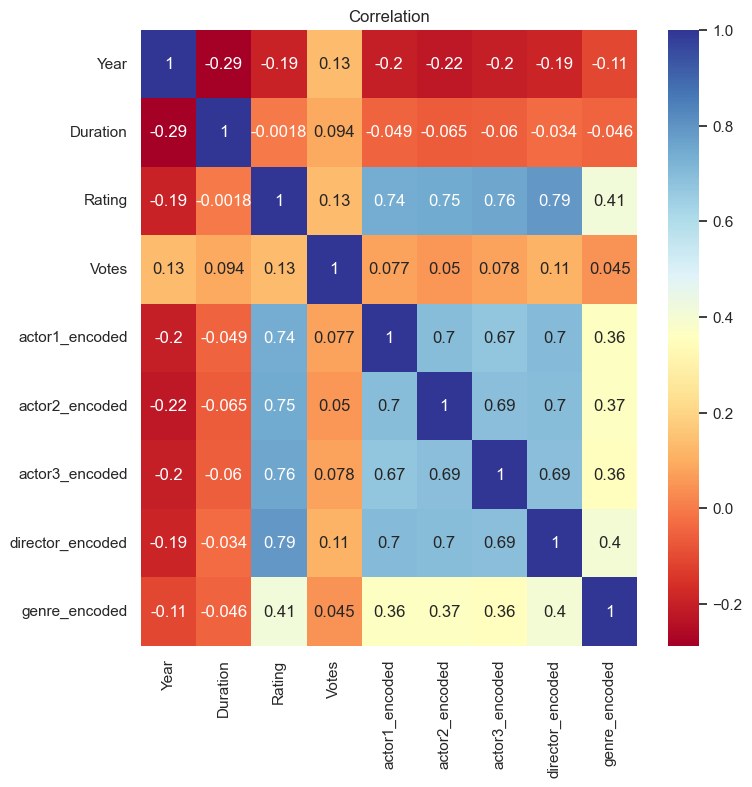

In [86]:
plt.figure(figsize= (8,8))
sns.heatmap(train.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [87]:
# just check with other method to making train1

In [88]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
train1[obj.columns] = train1[obj.columns].apply(lb.fit_transform)

In [89]:
train1.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,109,252,7.0,8,755,1686,2725,373
3,2019.0,110,205,4.4,35,1637,1500,865,2543
5,1997.0,147,175,4.7,827,1881,481,84,2422
6,2005.0,142,315,7.4,1086,2486,878,1346,2996
8,2012.0,82,351,5.6,326,161,2385,1416,1189


In [90]:
# train["Year"] = train["Year"].astype('category').cat.codes

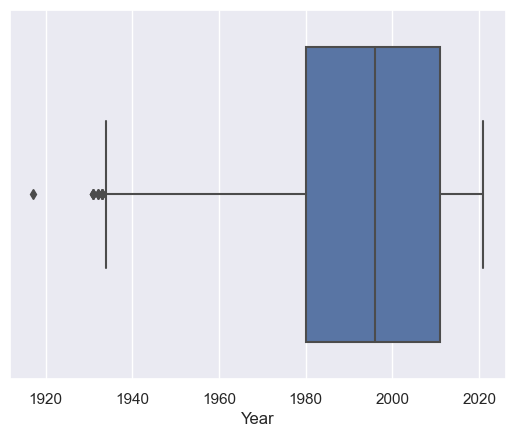

None


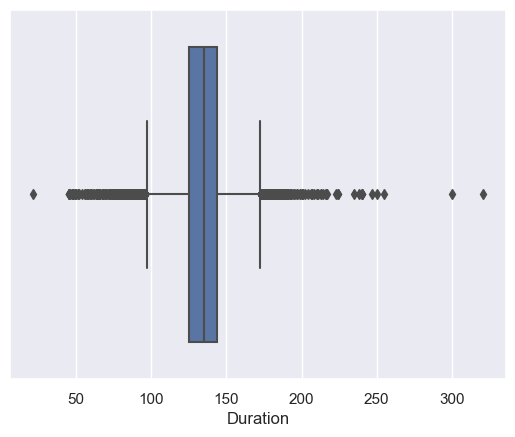

None


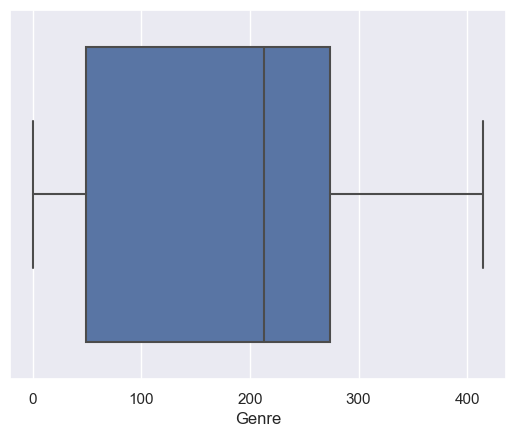

None


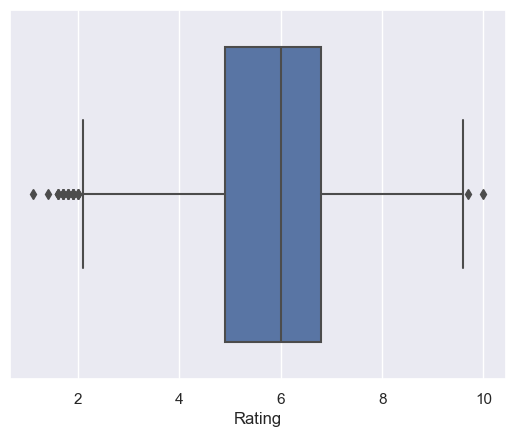

None


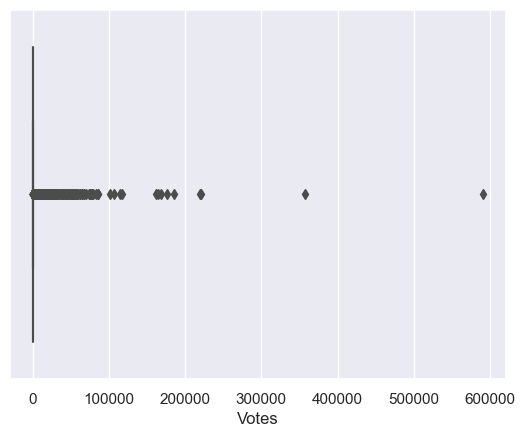

None


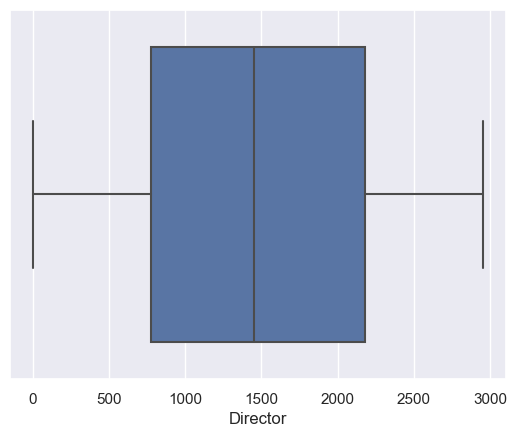

None


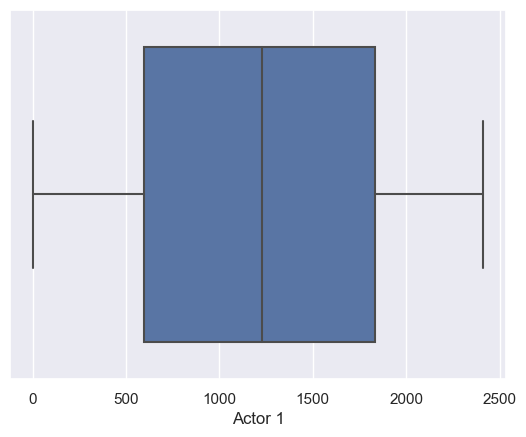

None


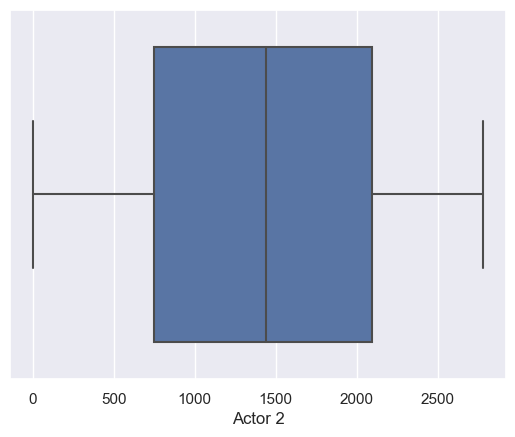

None


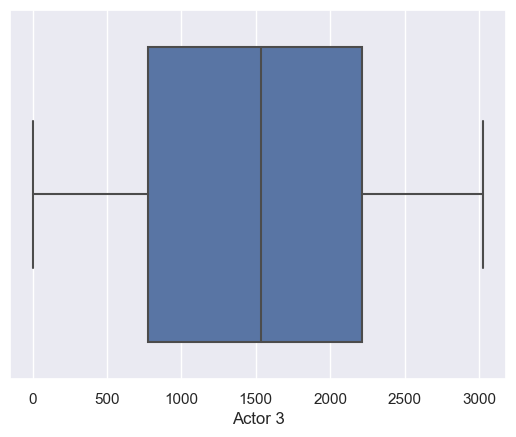

None


In [91]:
def obj(name):
    sns.boxplot(train1[name])
    plt.show()
for i in train1.select_dtypes(exclude="object"):
    print(obj(i))

In [92]:
q1 = train1["Duration"].quantile(0.25)
q3= train1["Duration"].quantile(0.75)
IQR = q3-q1
Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [93]:
train1["Duration"] = np.where(train1["Duration"] > Upper, Upper, np.where(train1["Duration"] < Lower, Lower, train1["Duration"]))

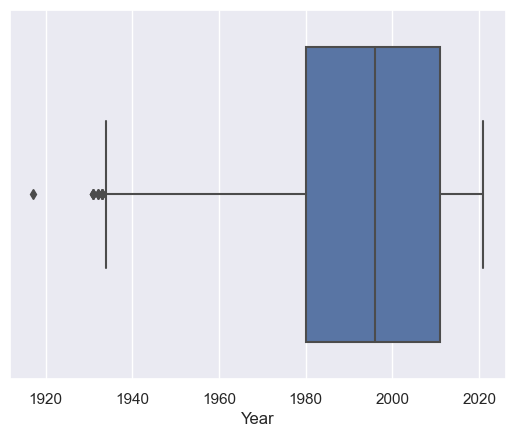

None


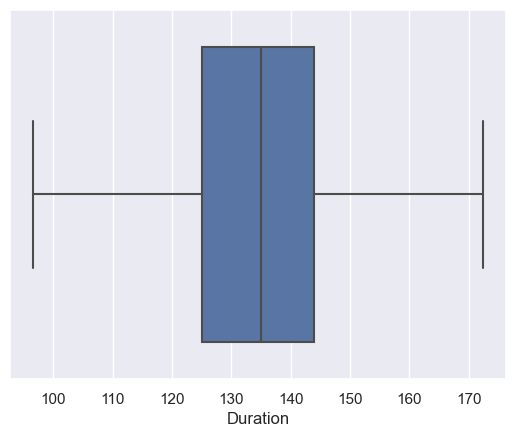

None


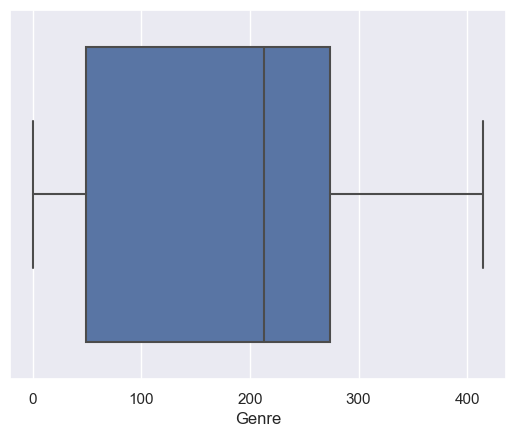

None


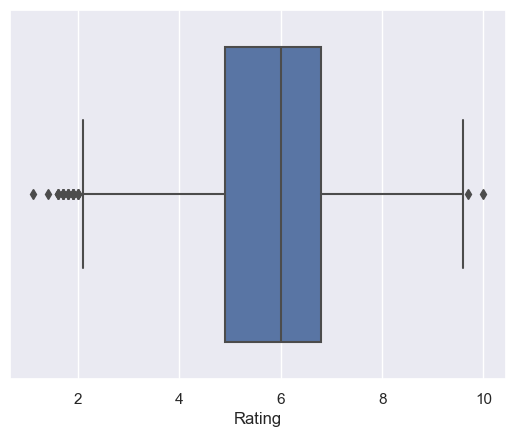

None


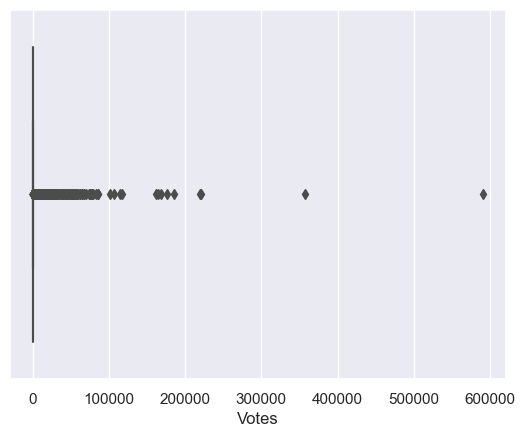

None


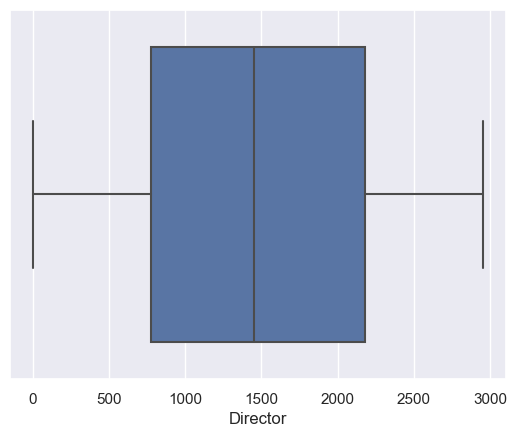

None


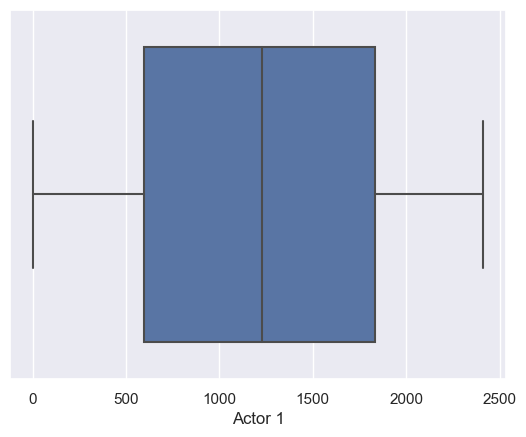

None


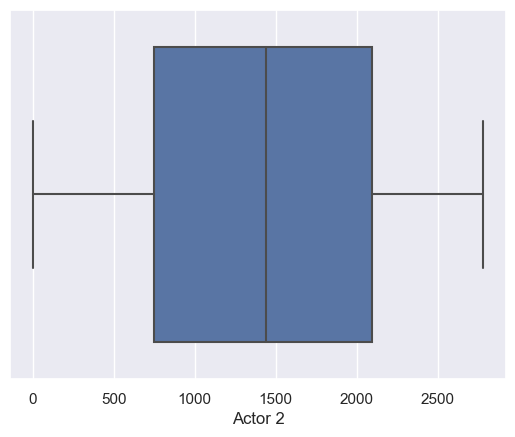

None


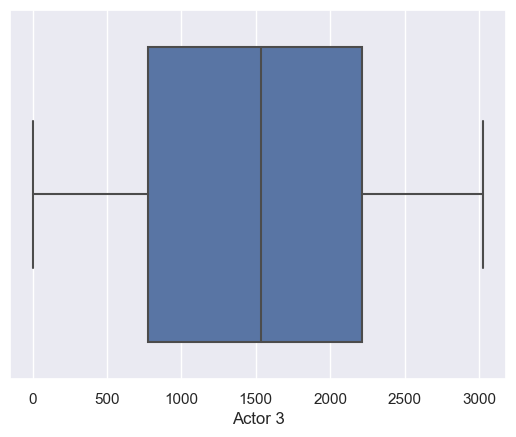

None


In [94]:
def obj(name):
    sns.boxplot(train1[name])
    plt.show()
for i in train1.select_dtypes(exclude="object"):
    print(obj(i))

In [95]:
train1.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,109.0,252,7.0,8,755,1686,2725,373
3,2019.0,110.0,205,4.4,35,1637,1500,865,2543
5,1997.0,147.0,175,4.7,827,1881,481,84,2422
6,2005.0,142.0,315,7.4,1086,2486,878,1346,2996
8,2012.0,96.5,351,5.6,326,161,2385,1416,1189


# making model with train dataset

In [96]:
x = train.drop("Rating", axis=1)
y = train[["Rating"]]

In [97]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
stt = st.fit_transform(x)
stt = pd.DataFrame(stt, columns=x.columns)

<AxesSubplot:>

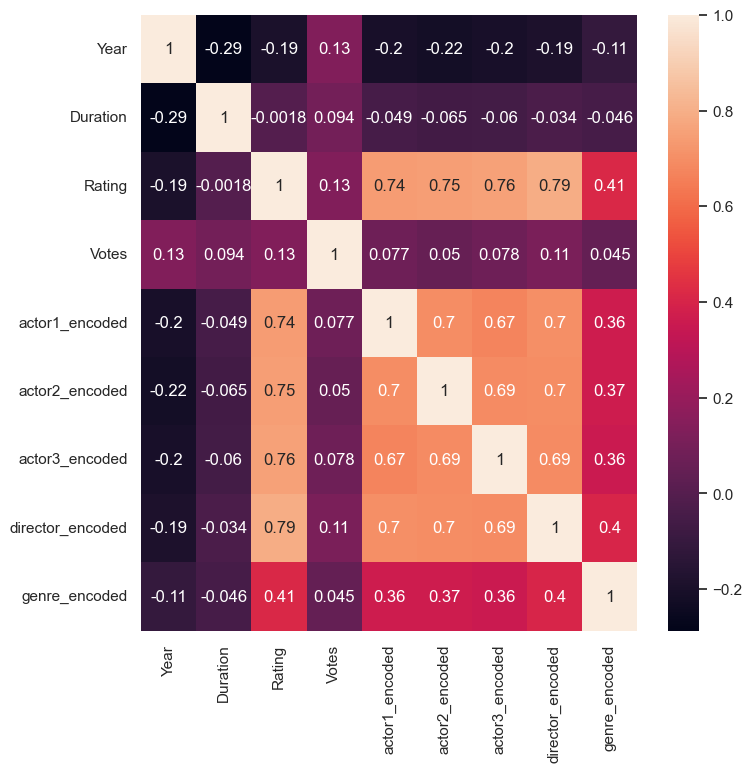

In [98]:
plt.figure(figsize= (8,8))
sns.heatmap(train.corr(), annot=True)

In [99]:
stt.describe()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
count,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000
mean,0.734817,0.376104,0.003423,0.512643,0.501509,0.495192,0.495178,0.485622
std,0.192353,0.073064,0.020068,0.118060,0.121931,0.124725,0.130243,0.080545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.605769,0.346667,0.000022,0.444767,0.428571,0.421687,0.412651,0.442857
50%,0.759615,0.380000,0.000095,0.523256,0.511905,0.506024,0.506024,0.471429
75%,0.903846,0.410000,0.000763,0.581395,0.571429,0.566265,0.590361,0.557143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Train and Test Data

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(stt, y, test_size= 0.2, random_state= 801)

# Approch 1 Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Prediction

In [103]:
trin_pr_lr = lr.predict(x_train)
test_pr_lr = lr.predict(x_test)

# Validation

In [104]:
from sklearn.metrics import r2_score
tr_val_lr = r2_score(y_train, trin_pr_lr)
te_val_lr = r2_score(y_test, test_pr_lr)
print(te_val_lr)
print(tr_val_lr)

0.767151234384183
0.7589512794423416


# Validation

In [105]:
# Evaluate the model performance on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error


print('MAE: ',mean_absolute_error(y_test, test_pr_lr))
print('MSE: ', mean_squared_error(y_test, test_pr_lr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, test_pr_lr)))

MAE:  0.4804579553432606
MSE:  0.4156123091420643
RMSE:  0.6446800052290007


# linearity of data

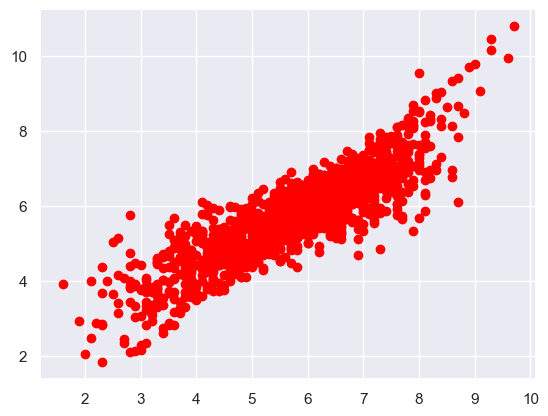

In [119]:
plt.scatter(y_test, test_pr_lr, c= "red")

The residuals are following the normally distributed with a mean 0. All good!

# normality of residual

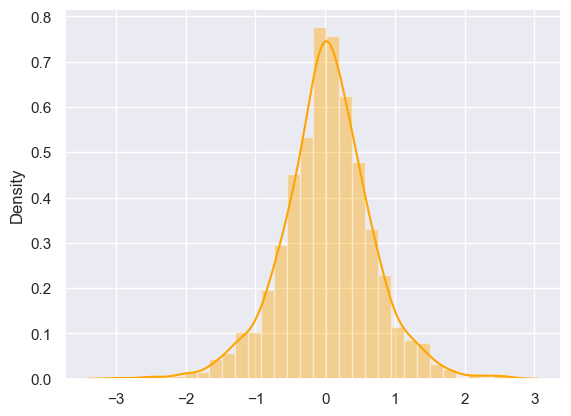

In [120]:
sns.distplot(y_test- test_pr_lr, bins=30, color= "orange")
plt.show()

## Summary of Model
* no homogenity
* normality in residual
* no autocorrelation
* no multicollinarity
* no overfitting and underfitting in the model -->

In [106]:
lr_acc = lr.score(x_test, y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)


Linear Regressor Accuracy -  76.7151234384183


# OLS

In [107]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [108]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model = smf.OLS(endog=y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          5.796e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:38:28   Log-Likelihood:                         -6211.1
No. Observations:                6046   AIC:                                  1.244e+04
Df Residuals:                    6038   BIC:                                  1.249e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Year                -0.0357      0.038     -0.943      0.346      -0.110       0.039
Duration             0.6028      0.093      6.454      0.000       0.420       0.786
Votes                2.9036      0.415      6.992      0.000       2.089       3.718
actor1_encoded       2.0913      0.115     18.126      0.000       1.865       2.317
actor2_encoded       2.2552      0.115     19.664      0.000       2.030       2.480
actor3_encoded       2.6935      0.107     25.170      0.000       2.484       2.903
director_encoded     3.4192      0.108     31.739      0.000       3.208       3.630
genre_encoded        0.7563      0.108      6.993      0.000       0.544       0.968
==============================================================================
Omnibus:                      333.810   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              976.791
Skew:                          -0.262   Prob(JB):                    7.81e-213
Kurtosis:                       4.898   Cond. No.                         66.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Approch 2 Lasso Method

In [109]:
from sklearn.linear_model import Lasso
lsso= Lasso(alpha= 0.1)
lsso.fit(x_train, y_train)
print(lsso.coef_)

[-0.          0.          0.          0.          0.          0.2928193
  2.28184011  0.        ]


In [110]:
y_pre_lasso_train= lsso.predict(x_train)
y_pre_lasso_train

array([5.7010483 , 5.79836772, 5.11313143, ..., 6.23970351, 5.85335182,
       5.42612781])

In [111]:
y_pre_lasso_test= lsso.predict(x_test)
y_pre_lasso_test

array([5.74618007, 5.49522368, 5.76734773, ..., 5.45361986, 4.92980792,
       5.88437181])

# Validation

In [112]:
from sklearn.metrics import r2_score
r2s= r2_score(y_test, y_pre_lasso_test)
r2t= r2_score(y_train, y_pre_lasso_train)
print(r2s)
print(r2t)
print('MAE: ',mean_absolute_error(y_test, y_pre_lasso_test))
print('MSE: ', mean_squared_error(y_test, y_pre_lasso_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pre_lasso_test)))

0.32478598976045114
0.32803477549137017
MAE:  0.8873200369382804
MSE:  1.2051910742088547
RMSE:  1.0978119484724398


# Approch 3 Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
rg =RandomForestRegressor()
rg.fit(x_train, y_train)

RandomForestRegressor()

# Prediction

In [114]:
pred_trn_rg = rg.predict(x_train)
pred_test_rg = rg.predict(x_test)

# Validation

In [115]:
rg_train_acc = r2_score(y_test, pred_test_rg)
rg_test_acc = r2_score(y_train, pred_trn_rg)
print(rg_train_acc)
print(rg_test_acc)
print('MAE: ',mean_absolute_error(y_test, pred_test_rg))
print('MSE: ', mean_squared_error(y_test, pred_test_rg))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_rg)))

0.8151862311881078
0.9719621608329364
MAE:  0.3946190476190476
MSE:  0.32987453042328047
RMSE:  0.5743470470223386


# Approch 4 Other Algorithm

In [116]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [117]:
gd = GradientBoostingRegressor()
bg = BaggingRegressor()
ada = AdaBoostRegressor()
lg = LinearRegression()
dt = DecisionTreeRegressor()

In [118]:
for model in [gd, bg, ada,lg, dt]:
    print("performance", model)
    abc = model.fit(x_train, y_train)
    y_pred_train = abc.predict(x_train)
    y_pred_test = abc.predict(x_test)
    train_acc1 = r2_score(y_train, y_pred_train)
    test_acc1 = r2_score(y_test, y_pred_test)
    print('MAE: ',mean_absolute_error(y_test, y_pred_test))
    print('MSE: ', mean_squared_error(y_test, y_pred_test))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print(" ")
    print("train r2: ",train_acc1)
    print("test r2: ",test_acc1)
    print("****"*10)

performance GradientBoostingRegressor()
MAE:  0.422140669559404
MSE:  0.3431881715604659
RMSE:  0.5858226451413994
 
train r2:  0.824986938923876
test r2:  0.8077272006530283
****************************************
performance BaggingRegressor()
MAE:  0.4272222222222222
MSE:  0.3726505291005291
RMSE:  0.6104510865749434
 
train r2:  0.9598414533388797
test r2:  0.7912207752309877
****************************************
performance AdaBoostRegressor()
MAE:  0.5695693070721096
MSE:  0.5572155916268418
RMSE:  0.7464687479237438
 
train r2:  0.7090220895193252
test r2:  0.6878173243712874
****************************************
performance LinearRegression()
MAE:  0.4804579553432606
MSE:  0.4156123091420643
RMSE:  0.6446800052290007
 
train r2:  0.7589512794423416
test r2:  0.767151234384183
****************************************
performance DecisionTreeRegressor()
MAE:  0.5696428571428572
MSE:  0.6851124338624338
RMSE:  0.827715188855704
 
train r2:  1.0
test r2:  0.6161625124572858


# conclusion
- Linear Regression and Gradient Boosting is the best Algorithm to prediction